### 퍼셉트론
#### 퍼셉트론이란?

w는 고유한 가중치를 뜻한다. theta는 임계값을 의미합니다. 이 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용한다. 즉, 가중치가 크면 해당신호가 더 중요하다는 뜻이다.

#### 단순한 논리회로
머신러닝 문제는 이 매개변수의 값을 정하는 작업을 컴퓨터가 자동으로 하도록 하고 이를 __학습__ 이라고 합니다. 사람이 하는 건 퍼셉트론의 모델을 고민하고 컴퓨터에 학습할 데이터를 주는 일을 합니다. 

#### 퍼셉트론 구현하기

In [6]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp < theta:
        return 0
    elif tmp > theta:
        return 1

In [7]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


b(편향)을 추가.

In [8]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7
w*x

array([0. , 0.5])

In [9]:
 np.sum(w*x) + b

-0.19999999999999996

#### 2.3.3. 가중치와 편향 구현하기
w1, w2는 입력신호가 결과에 주는 영향력을 조절하는 매개변수고, 편향은 **_뉴런이 얼마나 쉽게 활성화하느냐_** 를 조정하는 매개변수 입니당. 그럼 b가 -0.1이면 각 신호에 가중치를 곱한 값이 0.1이 넘으면 뉴런이 활성화되고, b가 -20.0이면 20이 넘어야 뉴런이 활성화 되겠죠?? 

In [10]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    tmp = np.sum(w*x)+b
    
    if tmp <= 0:
        return 0
    else:
        return 1

게이트들 모두 _구조는 같지만_, 가중치 매개변수의 값이 차이가 납니다!

### 2.4 퍼셉트론의 한계
퍼셉트론은 직선하나로 나눈 영역만 표현할 수 있습니다. 즉 하나의 퍼셉트론 만으로는 곡선은 표현할 수 없습니다. 다시 말해 단층 퍼셉트론으로는 비선형 영역을 분리할 수 없습니다. 이를 보완하기 위해 기존의 퍼셉트론들을 조합하는 방식을 쓸 수 있습니다. 

# 3. 신경망🧚🏻‍♀️

### 3.2 활성화 함수
#### 3.2.3 계단함수 구현하기

In [11]:
# 계단함수
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [12]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
print(y)

[False  True  True]


In [13]:
# numpy.astype(np.int) : 넘파이 배열의 자료형을 변환하기 위한 메서드.
y = y.astype(np.int)
y

array([0, 1, 1])

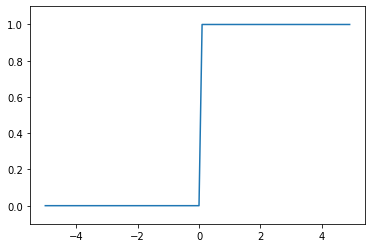

In [88]:
# 계단함수 구현하기
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y2 = step_function(x)
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()

#### 3.2.4 시그모이드 함수 구현하기

여기서 인수 x가 넘파이 배열이어도 올바른 결과가 나오는 이유는 바로 __'넘파이의 브로드캐스팅'__ 기능 때문입니다! 

In [89]:
# 시그모이드 함수 구현하기.
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [90]:
# 브로드 캐스팅 복습
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


이렇듯 시그모이드 함수도 넘파이 배열의 각 원소에 연산을 수행한 결과를 내줍니다.

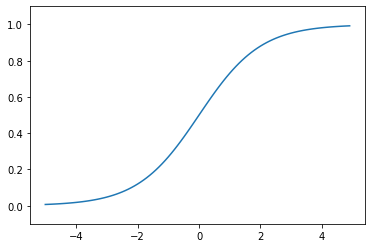

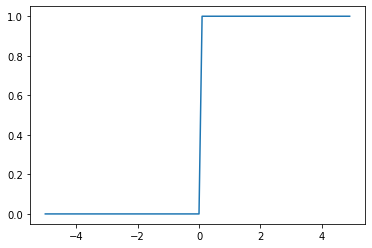

In [91]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

y2 = step_function(x)
plt.plot(x, y2)
plt.show()

#### 3.2.5/6
계단함수와 시그모이드 함수는 '매끄러움'이라는 면에서 차이점이 있지만, **비선형 함수**이며 둘다 입력이 작으면 0에 가까운 값을 출력하고, 입력이 크면 1에 가까운 값을 출력합니다. 여기서 비선형함수란, 선형이 아닌 함수! 즉 y = ax+b의 형태로 나타내지 못하는 함수를 의미합니다.<br>

그렇다면 _신경망에서 '비선형 함수'_ 를 쓰는 이유는 무엇일까요? <br>
선형함수로는 여러층으로 구성하는 이점을 살릴 수 없기 때문입니다.

#### 3.2.7 ReLU 함수
**_입력_** 이 0을 넘으면 입력을 그대로 출력하고, 0이하면 0을 출력하는 함수입니다. 

In [18]:
def relu(x):
    return np.maximum(0, x)

In [19]:
A = np.array([1, 2, 3, 4])
print(np.ndim(A))
print(A.shape) # tuple 반환 
print(A.shape[0])

1
(4,)
4


### 3.3  🤓다차원 배열 계산
#### 3.3.2 행렬의 내적


In [20]:
# 내적 계산
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)

np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

행렬 A의 첫번째 차원의 원소수와 B의 0번째 차원의 원소수가 같아야 합니다. 

In [21]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([7, 8])
# print(np.ndim(B))

np.dot(A, B)

array([23, 53, 83])

#### 3.3.4 신경망의 내적


In [22]:
X = np.array([1, 
              2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
(2, 3)
[ 5 11 17]


### 3.4 🤓3층 신경망 구현하기

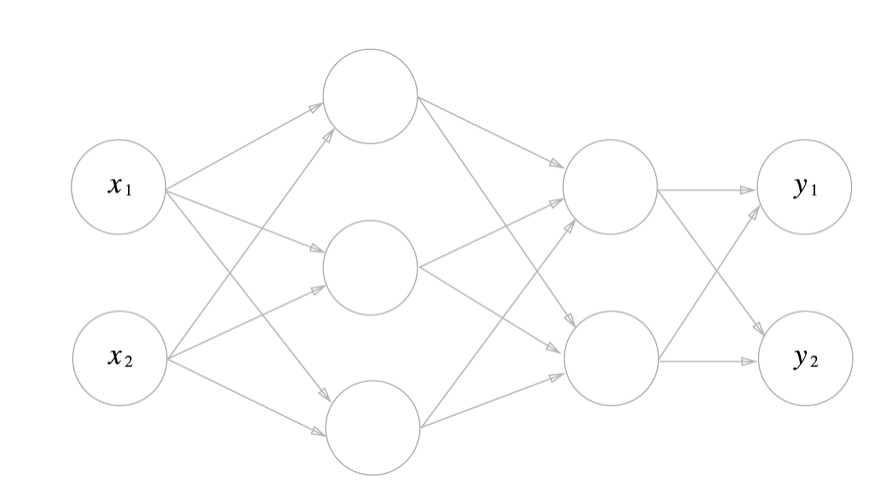

넘파이 배열을 써서 __신경망의 순방향 처리__ 를 완성하자. 

#### 3.4.2 각층의 신호전달 구현하기

In [23]:
import numpy as np

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [25]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [26]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


+ 항등함수 identity_function() 정의 : 입력을 그대로 출력하는 함수
+ 이 예제에서는 활성화 함수로 __항등함수__ 를 사용했는데, 이 활성화 함수는 문제의 종류에 따라 다르게 해주면 된다. 회귀에는 항등함수, 2클래스 분류에는 __시그모이드 함수__, 다중 클래스 분류에는 __소프트 맥스 함수__ 를 사용한다. 

In [27]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

#### 3.4.3 구현 정리
=> Numpy를 이용하면 신경망을 효율적으로 구현할 수 있다.

In [29]:
def init_network():
    network = {} # dictionary로 놔두기. 
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

# forward(network, x): 입력신호를 출력신호로 변환해줌!
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 🤓3.5 출력층 설계하기

+ 항등함수
+ 소프트맥스 함수
    - 모든 출력층으로부터 입력을 받아야 한다.
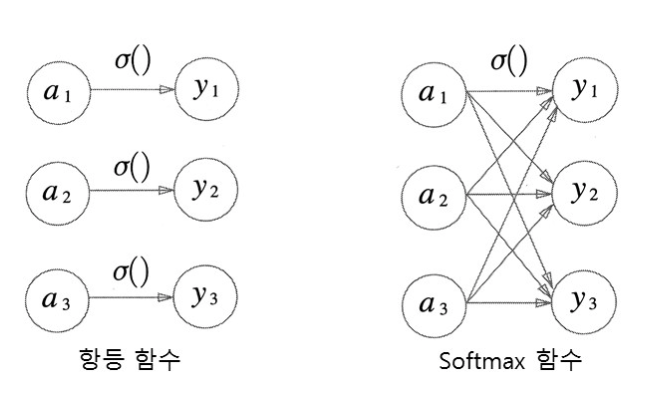

In [30]:
a = np.array([0.3, 2.9, 4.0])

In [31]:
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [32]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [33]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [40]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [41]:
# 소프트맥스의 오버플로우를 해결하자. 
a = np.array([1010, 1000, 900])
np.exp(a) / np.sum(np.exp(a))

/Users/choeseulgi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/choeseulgi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan, nan, nan])

In [42]:
c = np.max(a)
a-c

array([   0,  -10, -110])

In [43]:
np.exp(a-c) / np.sum(np.exp(a - c))

array([9.99954602e-01, 4.53978687e-05, 1.68883521e-48])

#### 3.5.3 소프트맥스 함수의 특징
+ 소프트 맥스 출력의 총합은 1이다. 각각의 소프트맥스 함수의 출력은 0에서 1.0사이의 실수인데, 이 출력을 '확률'로 해석할 수 있다. 예시로 y[1]의 확률이 0.029(29%)라면 29%의 확률로 1번째 클래스라고 할 수 있습니다. 

#### 3.5.4 출력층의 뉴런 수 정하기

### 3.6 🤓손글씨 숫자 인식
이 예제에서는 _이미 학습된 매개변수를 사용_ 하고 추론과정만 구현했다. 이 추론과정을 신경망의 순전파(__forward propagation__) 이라고 한다. 추론단계에서는 학습된 매개변수를 가지고 입력데이터를 분류한다. 

In [77]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from dataset.neuralnet_mnist import get_data, init_network, predict

In [78]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


#### 3.6.2 신경망의 추론처리
입력층 뉴런을 784, 출력층 뉴런을 19개로 구성해주는데 여기서 입력층 뉴런이 784개인 이유는 이미지 크기가 28 * 28이기 때문이다. 

In [82]:
x, t = get_data() # x는 10000개의 픽셀데이터, t는 10000개의 정답
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy: ", str(float(accuracy_cnt)/len(x)))

Accuracy:  0.9352


#### 3.6.3 배치처리
+ __정규화__ : 데이터를 특정 범위로 변환하는 처리'<br>
+ __전처리__ : 신경망의 입력 데이터에 특정 변환을 가하는 것.<br>
    여기서는 전처리로 정규화를 사용한 것이다. <br>
+ __batch__ : 하나로 묶은 입력 데이터 e.g. 100장 분량의 데이터를 하나의 입력데이터로 표현하는 것.<br>
    이렇듯 데이터를 배치로 처리하게 되면 효율적이고 바르게 처리하는 것이 가능하다!

In [85]:
x, t = get_data()
network = init_network()

batch_size = 100
accruacy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i : i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) #?
    
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 1.8704


In [87]:
#?
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y == t)
np.sum(y == t)

[ True  True False  True]


3